<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Student-Information" data-toc-modified-id="Student-Information-0.1">Student Information</a></span></li><li><span><a href="#Instructions" data-toc-modified-id="Instructions-0.2">Instructions</a></span></li></ul></li><li><span><a href="#Part-1" data-toc-modified-id="Part-1-1">Part 1</a></span><ul class="toc-item"><li><span><a href="#&gt;&gt;&gt;-Exercise-1-(Take-home):" data-toc-modified-id=">>>-Exercise-1-(Take-home):-1.1"><strong>&gt;&gt;&gt; Exercise 1 (Take home):</strong></a></span></li><li><span><a href="#&gt;&gt;&gt;-Exercise-2-(Take-home):" data-toc-modified-id=">>>-Exercise-2-(Take-home):-1.2"><strong>&gt;&gt;&gt; Exercise 2 (Take home):</strong></a></span></li><li><span><a href="#&gt;&gt;&gt;-Exercise-3-(Take-home):" data-toc-modified-id=">>>-Exercise-3-(Take-home):-1.3"><strong>&gt;&gt;&gt; Exercise 3 (Take home):</strong></a></span></li><li><span><a href="#&gt;&gt;&gt;-Exercise-4-(Take-home):" data-toc-modified-id=">>>-Exercise-4-(Take-home):-1.4"><strong>&gt;&gt;&gt; Exercise 4 (Take home):</strong></a></span></li><li><span><a href="#&gt;&gt;&gt;-Exercise-5-(Take-home):" data-toc-modified-id=">>>-Exercise-5-(Take-home):-1.5"><strong>&gt;&gt;&gt; Exercise 5 (Take home):</strong></a></span></li><li><span><a href="#&gt;&gt;&gt;-Exercise-6-(Take-home):" data-toc-modified-id=">>>-Exercise-6-(Take-home):-1.6"><strong>&gt;&gt;&gt; Exercise 6 (Take home):</strong></a></span></li><li><span><a href="#&gt;&gt;&gt;-Exercise-7-(Take-home):" data-toc-modified-id=">>>-Exercise-7-(Take-home):-1.7"><strong>&gt;&gt;&gt; Exercise 7 (Take home):</strong></a></span></li><li><span><a href="#&gt;&gt;&gt;-Exercise-8-(Take-home):" data-toc-modified-id=">>>-Exercise-8-(Take-home):-1.8"><strong>&gt;&gt;&gt; Exercise 8 (Take home):</strong></a></span></li></ul></li><li><span><a href="#Part-2" data-toc-modified-id="Part-2-2">Part 2</a></span></li><li><span><a href="#Part-3" data-toc-modified-id="Part-3-3">Part 3</a></span><ul class="toc-item"><li><span><a href="#Preprocessing-steps" data-toc-modified-id="Preprocessing-steps-3.1">Preprocessing steps</a></span></li><li><span><a href="#Feature-engineering-steps" data-toc-modified-id="Feature-engineering-steps-3.2">Feature engineering steps</a></span></li><li><span><a href="#Explanation-of-model" data-toc-modified-id="Explanation-of-model-3.3">Explanation of model</a></span></li><li><span><a href="#Different-things-you-tried" data-toc-modified-id="Different-things-you-tried-3.4">Different things you tried</a></span></li><li><span><a href="#Insights-gained" data-toc-modified-id="Insights-gained-3.5">Insights gained</a></span></li></ul></li><li><span><a href="#Part-4" data-toc-modified-id="Part-4-4">Part 4</a></span></li></ul></div>

### Student Information
Name: 陳聖融 Tan Sheng Rong

Student ID: X1080017

GitHub ID: @tansr7

Kaggle name: @tansr7

Kaggle private scoreboard snapshot: 

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

In [21]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh
from collections import Counter
from nltk.corpus import stopwords
import operator
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.manifold import TSNE
import numpy as np
# !pip install ujson
# import ujson
from pandas.io.json import json_normalize
import nltk
import keras
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

## Part 1

**Exercise 1 Preprocessing**

In [2]:
### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()
# shuffle dataset by doing a sample of 1 (which is the entire dataset). sampling shuffles data
train_df = train_df.sample(frac=1) 
test_df = test_df.sample(frac=1)

---
### **>>> Exercise 1 (Take home):**  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


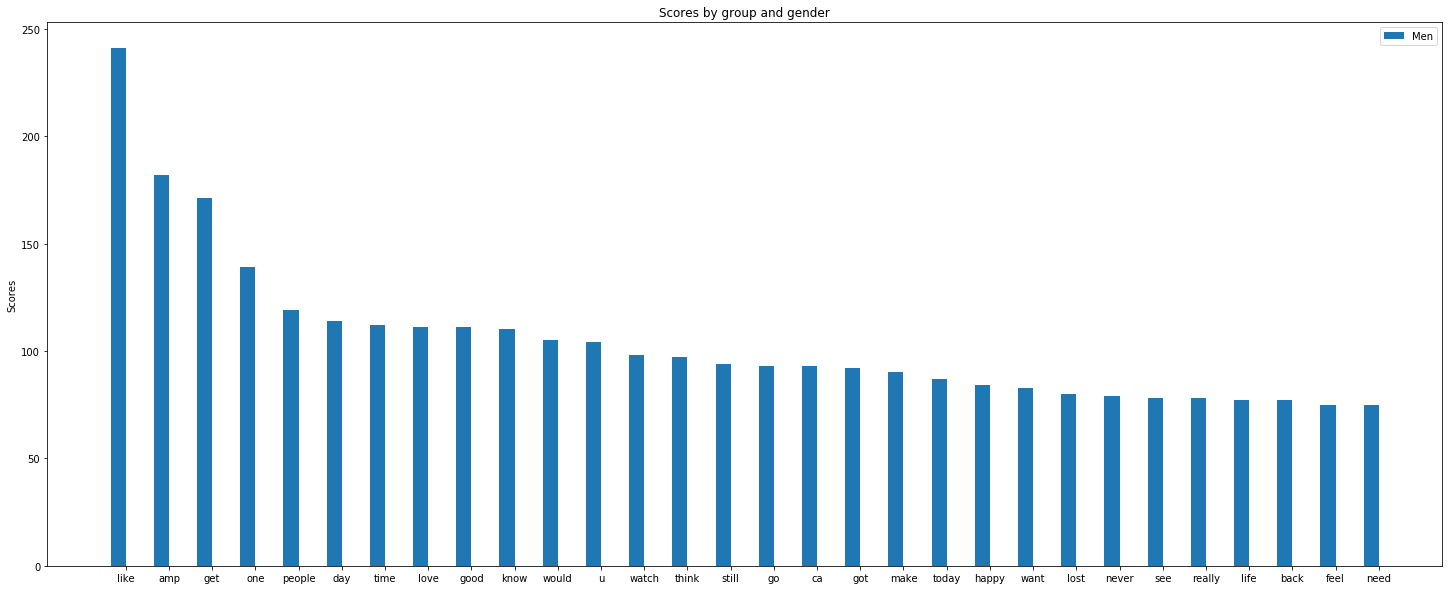

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25, 10]
df = train_df
# takes a like a minute or two to process
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))
df[0:4]["unigrams"]
terms_flatten = [item.lower() for sublist in df.unigrams.values for item in sublist if item.isalpha()]
term_count = Counter(terms_flatten)
alpha_terms = {}
for k,v in term_count.items():
    if k not in stopwords.words('english'):
        alpha_terms[k]=v
sorted_t = sorted(alpha_terms.items(), key=lambda x: x[1], reverse=True)[:30]
labels, word_len = [], []
for l, w in sorted_t:
    labels.append(l); word_len.append(w)   
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, word_len, width, label='Men')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

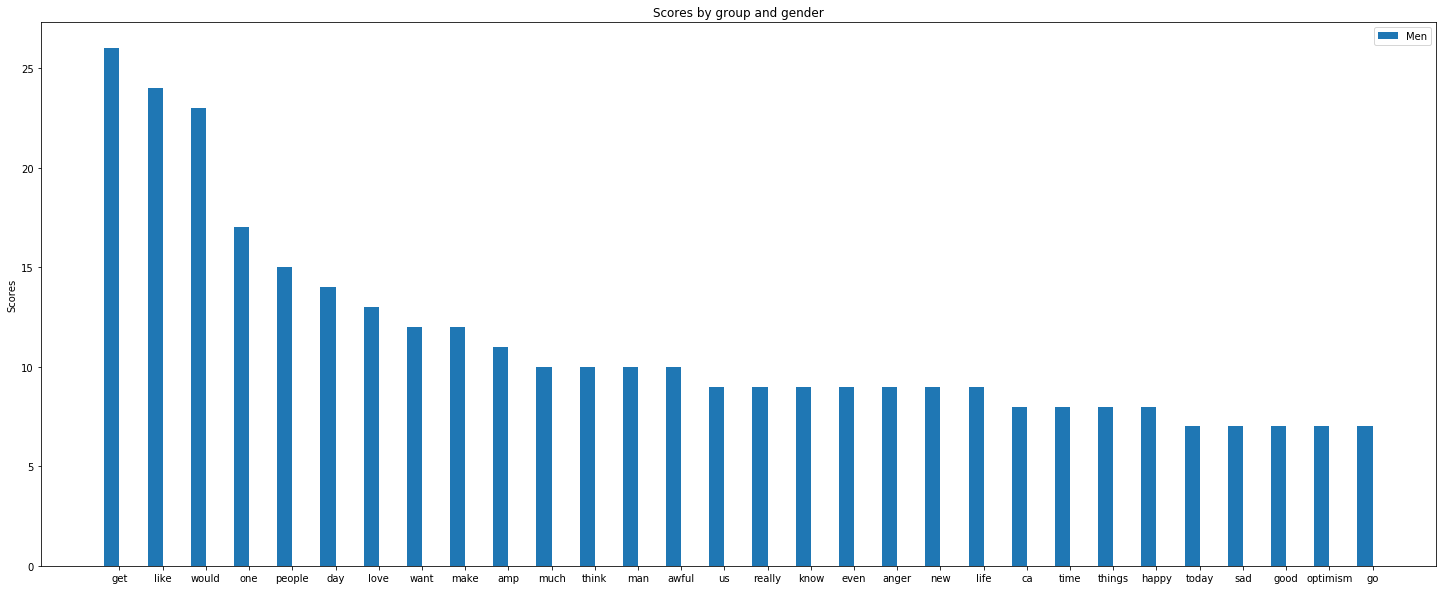

In [4]:
df = test_df
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))
df[0:4]["unigrams"]
terms_flatten = [item.lower() for sublist in df.unigrams.values for item in sublist if item.isalpha()]
term_count = Counter(terms_flatten)
alpha_terms = {}
for k,v in term_count.items():
    if k not in stopwords.words('english'):
        alpha_terms[k]=v
sorted_t = sorted(alpha_terms.items(), key=lambda x: x[1], reverse=True)[:30]
labels, word_len = [], []
for l, w in sorted_t:
    labels.append(l); word_len.append(w)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, word_len, width, label='Men')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

---
###  **>>> Exercise 2 (Take home):**  
Generate an embedding using the TF-IDF vectorizer instead of the BOW one with 1000 features and show the feature names for features [100:110].

In [5]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
vectorizer_count = tfidf_vectorizer.fit_transform(train_df['text'])
print(tfidf_vectorizer.get_feature_names()[100:110])

['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody', 'blues', 'body', 'boiling']


---
### **>>> Exercise 3 (Take home):**  

Can you interpret the results above? What do they mean?

The darker the color, the larger the value. 
The elements that lie on the diagonal of the confusion matrix are are the **True Positive (TP)** where the **Predicted Class** is the same as the **Actual Class**. They are elements that have the darkest shade. 

To be precise, the total number of True Positive for "Anger" is `55`, "Fear" is `70`, "Joy" is `54`, "Sadness" is `42`.

**Special rules of a Confusion Matrix for multiple classes**
> - the total number of False Negative (FN) is the sum of values in the corresponding column (excluding the TP)
- the total number of False Positive (FP) is the sum of values in the corresponding row (excluding the TP)
- the total number of True Negative (TN) for a certain class will be the sum of all columns and rows excluding that class's column and row

Let us select "Anger" as the class which we are concerned about. 

The FN for "Anger" is `15+5+9 = 29`

The FP for "Anger" is `16+9+4 = 29`

The TN for "Anger" is `70+9+16+13+54+7+14+9+42 = 234`

**Exercise 4 Preprocessing**

In [6]:
# Funciton for visualizing confusion_matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


array(['fear', 'sadness', 'sadness', 'fear', 'anger', 'joy', 'sadness',
       'joy', 'sadness', 'joy'], dtype=object)

---
### **>>> Exercise 4 (Take home):**  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [7]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

## build Maive Bayes model
clf = MultinomialNB()

## training!
NB_model = clf.fit(X_train, y_train)

## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'sadness', 'joy', 'fear', 'anger', 'joy', 'sadness', 'joy',
       'sadness', 'joy'], dtype='<U7')

In [8]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.72


In [9]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.83      0.78       110
         joy       0.76      0.71      0.73        79
     sadness       0.65      0.64      0.64        74

    accuracy                           0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347



In [10]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 14  5 10]
 [ 6 91  5  8]
 [ 9  7 56  7]
 [ 8 11  8 47]]


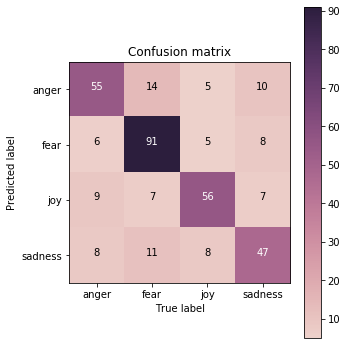

In [11]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### **>>> Exercise 5 (Take home):**  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

> How do the results from the Naive Bayes model and the Decision Tree model compare?
1. The training accuracy for the Decision Tree is higher than the Naive Bayes model
2. The testing accuracy for the Decision Tree is lower than the Naive Bayes model

> How do you interpret these differences?
- 1a. A Decision Tree's training accuracy will be very close to 1 as the downside of this model is designed to perfectly fit all samples in the training data set. 
- 1b. Conversely, Naive Bayes model utilises a Simple (linear) hypothesis function. It suffers from high bias, or error resulting from inaccuracies in its hypothesis class, because its hypothesis function is so simple it cannot accurately represent many complex situations. 
- 2a. The testing accuracy for the Decision Tree is lower than the Naive Bayes model. The Decision Tree model is designed to perfectly fit all samples in the training data set. Thus it ends up with branches with strict rules of sparse data. Thus this effects the accuracy when predicting samples that are not part of the training set is lower as compared to a Naive Bayes model. 
- 2b. On the other hand, Naive Bayes model exhibits low variance, or failure to generalize to unseen data based on its training set, because it's hypothesis class' simplicity prevents it from overfitting to its training data. Therefore, the accuracy is never exceedingly high. 

**Exercise 6 Preprocessing**

In [12]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

## predict
pred_result = model.predict(X_test, batch_size=128)

pred_result = label_decode(label_encoder, pred_result)

#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

Using TensorFlow backend.
/Users/stan170/anaconda3/envs/data_mining/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/stan170/anaconda3/envs/data_mining/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/stan170/anaconda3/envs/data_mining/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)
check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2598        joy
3137    sadness
1660       fear
1233       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)
input_shape:  500
output_shape:  4





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_______________________________

---
### **>>> Exercise 6 (Take home):**  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

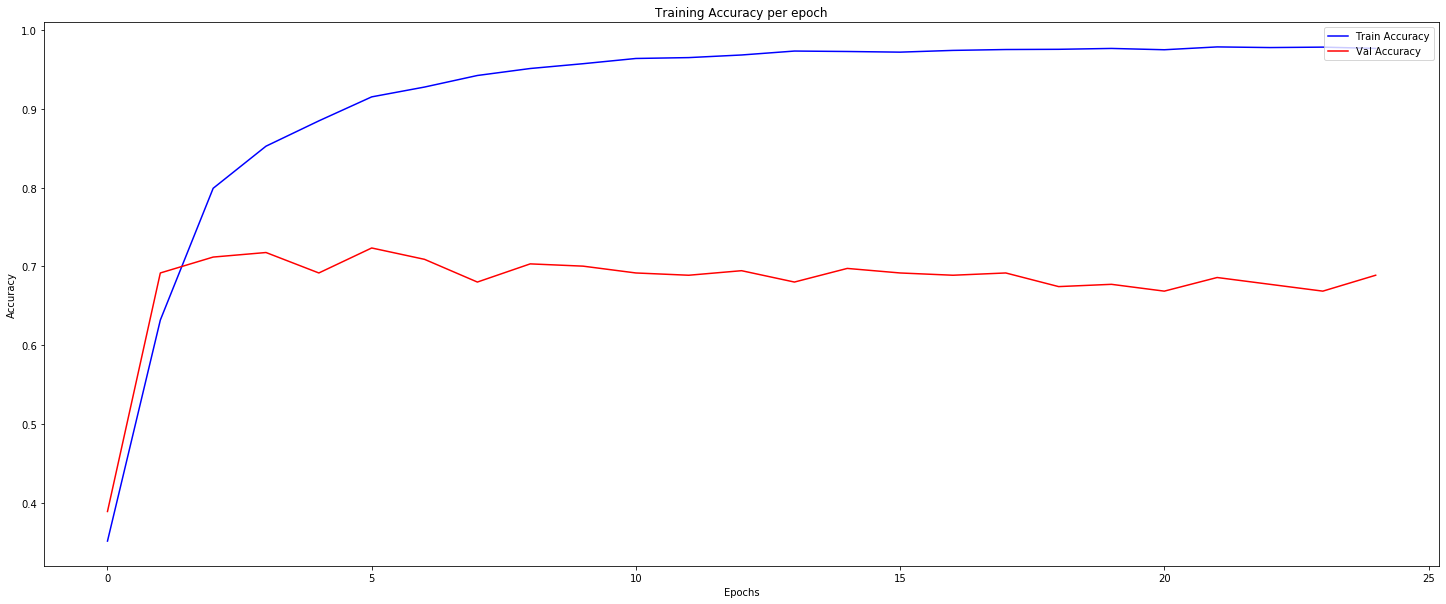

In [13]:
# Answer here
# Accuracy
plt.title('Training Accuracy per epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(training_log['epoch'], training_log['acc'], color = 'b', label = 'Train Accuracy')
plt.plot(training_log['epoch'], training_log['val_acc'], color = 'r', label = 'Val Accuracy')
plt.legend(loc = 'upper right')
plt.show()

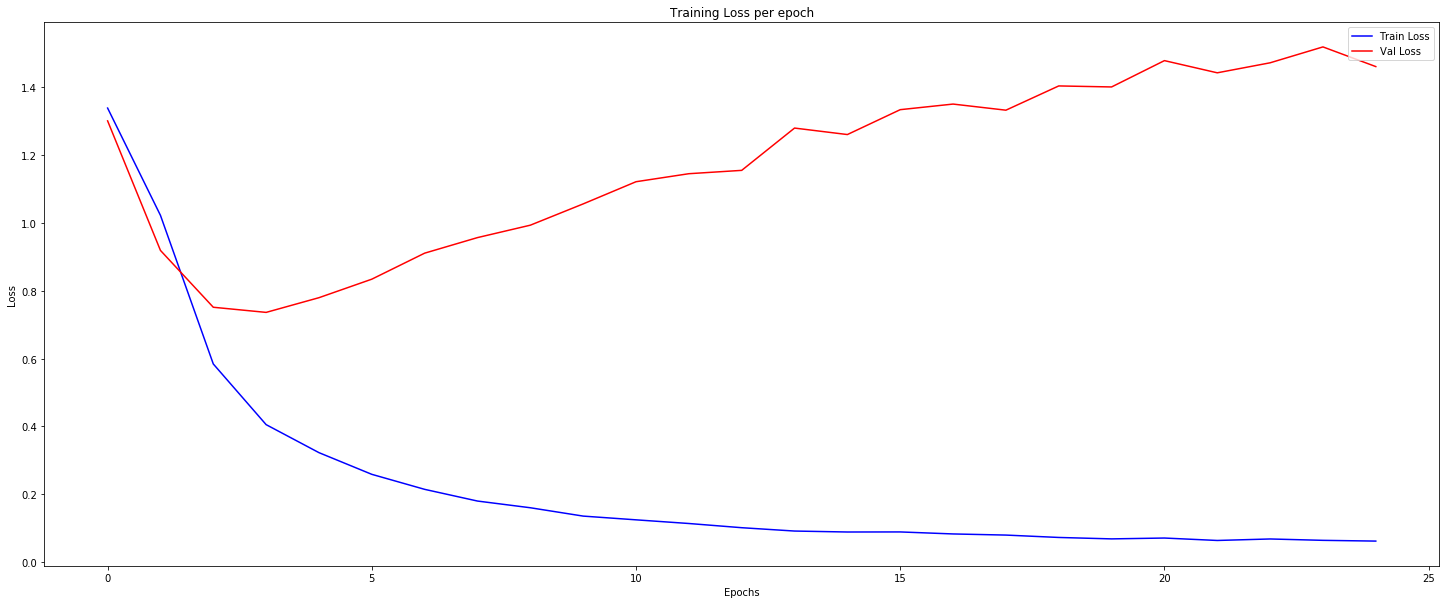

In [14]:
# Loss
plt.title('Training Loss per epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(training_log['epoch'], training_log['loss'], color = 'b', label = 'Train Loss')
plt.plot(training_log['epoch'], training_log['val_loss'], color = 'r', label = 'Val Loss')
plt.legend(loc = 'upper right')
plt.show()

<u>**How to interpret the graphs you got?**</u>
From the Training accuracy per epoch, we can tell that both graphs start off with the same accuracy. The **Val Accuracy** reached a plateau earlier than **Train Accuracy**. This shows that the model is not efficient beyond a certain number of epoch.
The maximum accuracy obtainable for val and train is 0.7 and 0.9+. The model is learning the training data very well but not the testing data. 

<u>**How are they related to the concept of overfitting/underfitting covered in class?**</u>

These graphs illustrates a clear sign of overfitting. From the Training Loss per epoch graph, it can be seen that the **Train Loss** is going down while the **Val Loss** is rising. It’s learning the training data really well but fails to generalize the knowledge to the test data.

The two loss and accuracy starts out the same, but CV cost increases as training cost decreases. Since they started out the same, we know the model was equally poor at explaining the two data sets while in its untrained state.

---
### **>>> Exercise 7 (Take home):**  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

Firstly, the sequence of words could be converted into document-term matrix and create a word-vector dictionary to limit the dictionary to only have words from the training data.

Alternatively, we could simply obtain the average of the word vectors in a sequence of words/sentence. However, this would mean that the context of words in the sentence is not being considered. 

**Exercise 8 Preprocessing**

In [15]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


---
### **>>> Exercise 8 (Take home):**  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).


In [ ]:
word_list = ['angry', 'happy', 'sad', 'fear']
topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        
target_words = angry_words + happy_words + sad_words + fear_words
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

In [ ]:
%matplotlib inline
## w2v model
model = w2v_google_model
## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]
## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)
## training
X_tsne = tsne.fit_transform(X_train)
## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## Part 2

![Snapshot](img/pic0.png)

## Part 3

### Preprocessing steps

In [17]:
#read in the datas
data_identification = pd.read_csv("./kaggle_data/data_identification.csv")
emotion = pd.read_csv("./kaggle_data/emotion.csv")
sampleSubmission = pd.read_csv("./kaggle_data/sampleSubmission.csv")
raw_data = pd.read_json("./kaggle_data/tweets_DM.json",
                        lines=True,
                        orient='columns')

**File descriptions**

tweets_DM.json - Raw data from Twitter

emotion.csv - Lists the emotion labels per tweet_id

data_identification.csv - A file that identifies membership of training or testing set per tweet_id. Note that you won´t be provided with the labels for the testing set, but you will have to predict for these when you make your submission.

sampleSubmission.csv - A submission format you should follow for submitting to the competition

In [18]:
provider = pd.DataFrame([md for md in raw_data._source])
provider = pd.DataFrame([md for md in provider.tweet])
provider['score'] = raw_data._score
provider['crawldate'] = raw_data._crawldate
provider['type'] = raw_data._type
raw_data['_index'].drop_duplicates() 
## _index is useless
##creating the training set
train_df = pd.merge(data_identification,emotion)
train_df = pd.merge(train_df,provider)
##creating the testing set
predi_df = data_identification.loc[data_identification['identification']=='test']
predi_df = pd.merge(predi_df,provider)

In [19]:
## Split df with emotion into 7:3 ratio for checking the accuracy 
# check if there are cols that are not relevant, drop if they are not applicable 
print(train_df['type'].drop_duplicates())
print(train_df['identification'].drop_duplicates())
train_df = train_df.drop(columns = ['type', 'identification'])
## random df first
train_df.sample(frac = 1, random_state = 7)
## split set to train and test and reset index
test_df = train_df[int(train_df.shape[0]*0.7) :]
train_df = train_df[: int(train_df.shape[0]*0.7)]
test_df = test_df.reset_index()

0    tweets
Name: type, dtype: object
0    train
Name: identification, dtype: object


In [20]:
## save to pickle file, for speed
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")
predi_df.to_pickle("predi_df.pkl")
## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")
predi_df = pd.read_pickle("predi_df.pkl")

### Feature engineering steps 

In [ ]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
# apply analyzer to training data
BOW_500.fit(train_df['text']) # would changing this to the entire train set be better than the 70% of test set

In [ ]:
# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

In [ ]:
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [ ]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

### Explanation of model

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

In [ ]:
## predict on training data
pred_result = model.predict(X_test, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

In [ ]:
## predict on competition data
X_submission = BOW_500.transform(predi_df['text'])
pred_result = model.predict(X_submission, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)
tmp_pred_result = pd.DataFrame(pred_result, columns=['emotion'])
tmp_pred_result['id'] = predi_df['tweet_id']
columnsTitles=["id","emotion"]
tmp_pred_result=tmp_pred_result.reindex(columns=columnsTitles)
tmp_pred_result.to_csv('submission.csv', index=False)

### Different things you tried

- I tried changing the model of the keras from the *Functional Model* to the *Sequential Model*
- I tried changing the embedding from 

### Insights gained

Initially i tried running the model on my machine (MBP without GPU and SSD **128GB**) but was unable to train out the model at all. The sheer size of w2v_google_model and the BOW500 made it impossible to run the encoding on my computer without running out of memory. 

- tried Google Colab 
  - Pros: Colab is able to link with Google drive
  - Cons: It kept running out of time when i tried using a sequential model. Even after I used Keras's callback method after a few epochs, it was to no avail. 
- tried Kaggle notebook 
  - Pros: More familiar as the competition for this module is also on Kaggle
  
I have tried using glove 200d (Global Vectors for Word Representation) as the embedding but the accuracy did not improve compared to the google model. This would probably be because of the existence of emoticons within the tweets. The glove model do not take them into consideration. 

On hindsight, I should have considered other models and not just Neural networks

## Part 4

I utilised the jupyter notebook's table of contents extension and organised the homework according to its respective parts and sub parts. 

i also removed comments from cells that were copied over from lab2-master. When multiple comments were copied over, i merged them into a single cell to reduce cluster and improve readability. 

Variable names were given appropriately to represent the value/data they were containing. 